In [1]:
import tensorflow as tf
import keras_tuner as kt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import os
os.chdir(r'D:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\RE\Reconstru--o\CLUPEIFORME')
print(os.getcwd())

D:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\RE\Reconstru--o\CLUPEIFORME


In [20]:
class PrintEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, N):
        super(PrintEveryNEpochs, self).__init__()
        self.N = N

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.N == 0:
            print(f"Epoch {epoch + 1}, Loss: {logs['loss']:.4f}")

In [15]:
df = pd.read_excel('propor\Manjuba_art_ind_prop.xlsx')
x0 = df[['Ano', 'Pro_art']].dropna().values
df_x0 = pd.DataFrame(x0, columns=['Ano', 'Pro_art'])

x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Pro_art'], dtype=np.float32).reshape(-1, 1)


x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Renan\AppData\Local\Temp\ipykernel_14240\910997793.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_excel('propor\Manjuba_art_ind_prop.xlsx')


In [27]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)))
    for i in range(hp.Int('num_layers', 2, 6)):  
        model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),  
            activation='leaky_relu'
        ))

    model.add(tf.keras.layers.Dense(1, activation='leaky_relu'))
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

  
    model.compile(
        optimizer=tf.keras.optimizers.Nadam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mse']
    )
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='mse', 
    max_trials=10,  
    executions_per_trial=2,  
    directory='my_tuning_dir',  
    project_name='tune_gracainha_art'
)

tuner.search(x_normalized, y_normalized, epochs=200, batch_size=12, validation_split=0.2)




Reloading Tuner from my_tuning_dir\tune_gracainha_art\tuner0.json


In [18]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Melhor número de camadas: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Melhor número de unidades na camada {i+1}: {best_hps.get('units_' + str(i))}")
print(f"Melhor taxa de aprendizado: {best_hps.get('learning_rate')}")

Melhor número de camadas: 4
Melhor número de unidades na camada 1: 480
Melhor número de unidades na camada 2: 128
Melhor número de unidades na camada 3: 192
Melhor número de unidades na camada 4: 192
Melhor taxa de aprendizado: 0.01


Epoch 1/200


C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 0.8037 - mse: 0.8970 - val_loss: 1.7583 - val_mse: 1.7583
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.9994 - mse: 1.1513 - val_loss: 1.4078 - val_mse: 1.4078
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.8058 - mse: 3.4061 - val_loss: 1.3642 - val_mse: 1.3642
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.8980 - mse: 0.8898 - val_loss: 1.3759 - val_mse: 1.3759
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9573 - mse: 0.8656 - val_loss: 1.3598 - val_mse: 1.3598
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.8969 - mse: 0.8884 - val_loss: 1.4070 - val_mse: 1.4070
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8598 - mse: 0.8861 - val_loss: 1.5154 - val_mse: 1.5154
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7738 - mse: 0.8309 - val_loss: 1.4439 - val_mse: 1.4439
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9734 - mse: 0.7402 - va

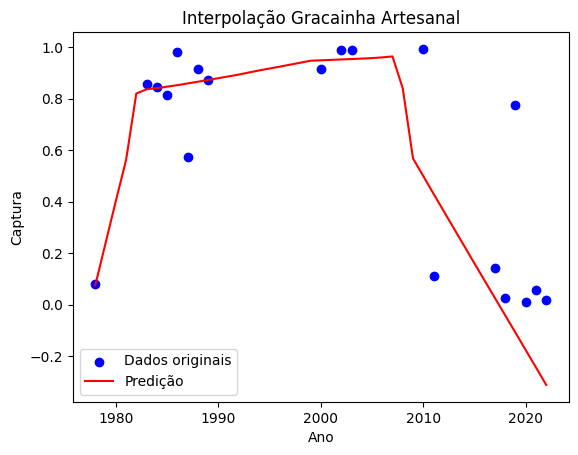

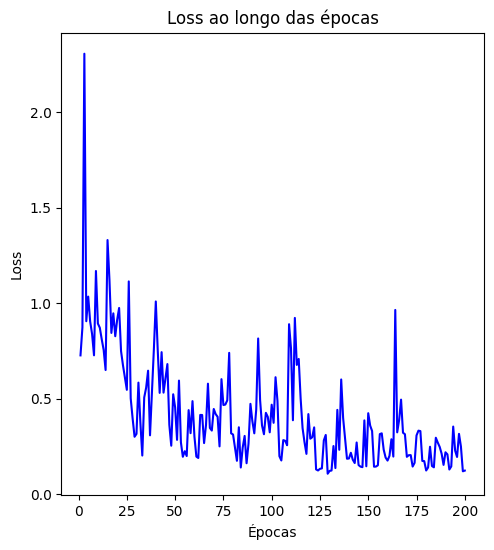

In [26]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_normalized, y_normalized, epochs=200, batch_size=12, validation_split=0.2)


x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Interpolação Gracainha Artesanal')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()